# WRKY_DBD

## Domain Knowledge

* Transcription factors (TFs, 轉錄因子) are proteins that controls the rate of transcription of genetic information from DNA to messenger RNA, by binding to a specific DNA sequence.

* Transcription factors contain two domains:
    * DNA-binding domain (DBD): attaches to specific sequences of DNA
    * Activation domain (AD):

* TFs are classified into families according to their DBDs.

### Motivations

* Only a handful of TFs have been studied their DNA binding patterns.
    * only < 2% of eukaryotic TFs (M. T. Weirauch, et. al, 2014)
    * About 57% of Arabidopsis thaliana TFs (Data from PlantPAN 3.0 and PlantTFDB v4.0)
* Experimental protein structure determination is hard.

### Problems

* Whether we can predict **DNA binding sites** (DNA結合位點) by using polypeptide (多肽) sequences or DNA-binding domain?
* Whether we can determine **the key amino acids**(必須胺基酸) essential for **DNA recognition** from known **TF-DNA pairs**?
* Are there **unknown features** in polypeptide sequences which can be used to illustrate the interaction between TF and DNA?

## Datasets descriptions

### WRKY_info_table_positive.txt
Column Name:
* TF identifier (TF_ID):在第一個數字以前的，是該植物的品種縮寫；此處所有的TF皆是屬於WRKY家族的。
* Protein sequence identifier (Pseq_ID):蛋白質序列的ID(同個TF_ID可能有一個以上的Pseq_ID)
* Protein primary sequence (Pseq):蛋白質序列，對應Pseq_ID，有不同的胺基酸組成序列，每一個英文字母對應一種[胺基酸](http://www.bioinformatics.org/sms/iupac.html)
* DNA- binding domain sequence (DBD_seq):蛋白質序列(Pseq)中，DBD的序列
* Binding matrix identifier (matrix_ID):要進行轉錄的DNA片段

Note: Please don’t use matrix_ID as a feature.

### All_matrices_output.txt
Column Name:
* Binding matrix identifier (matrix_ID):要進行轉錄的DNA片段(基因)
* A
* C
* G
* T
## Load datasets

In [1]:
import pandas as pd

In [2]:
dfp = pd.read_csv('WRKY_info_20190507/WRKY_info_table_positive.txt', sep='\t')
dfn1 = pd.read_csv('WRKY_info_20190507/WRKY_info_table_negative_one.txt', sep='\t')
dfn2 = pd.read_csv('WRKY_info_20190507/WRKY_info_table_negative_two.txt', sep='\t')
dfn3 = pd.read_csv('WRKY_info_20190507/WRKY_info_table_negative_three.txt', sep='\t')

In [3]:
dfp.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
0,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0270
1,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0339
2,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0449
3,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0451
4,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0465


### Parse .meme file

In [4]:
inputfile = open('WRKY_info_20190507/All_matrices.meme', 'r')

In [5]:
for i in range(9):
    inputfile.readline()

In [6]:
outputfile = open('WRKY_info_20190507/All_matrices_output.txt', 'w')

In [7]:
outputfile.write('matrix_ID\tA\tC\tG\tT\n')

18

In [8]:
while True:
    s1 = inputfile.readline().rstrip('\n')
    
    # if this is the eof
    if len(s1) == 0:
        break
        
    t1 = s1.split()
    matrix_id = t1[1]

    inputfile.readline()
    inputfile.readline()
    while True:
        s2 = inputfile.readline()
        if s2 == '\n':
            break
        outputfile.write(matrix_id + '\t')
        outputfile.write(s2)

In [9]:
outputfile.close()
inputfile.close()

In [10]:
dfmeme = pd.read_csv('WRKY_info_20190507/All_matrices_output.txt', sep='\t')
dfmeme.head()

,matrix_ID,A,C,G,T
0,TF_motif_seq_0001,1.0,0.0,0.0,0.0
1,TF_motif_seq_0001,1.0,0.0,0.0,0.0
2,TF_motif_seq_0001,0.0,1.0,0.0,0.0
3,TF_motif_seq_0001,0.0,1.0,0.0,0.0
4,TF_motif_seq_0001,0.0,0.0,0.0,1.0


## Analysis

In [11]:
import logomaker as lm

In [12]:
def draw_matrix(matrix_name):
    m = dfmeme[dfmeme.matrix_ID == matrix_name].reset_index().drop(['matrix_ID', 'index'], axis=1)
    m.index = m.index + 1
    lm.Logo(m)

In [13]:
dfmeme[dfmeme.matrix_ID == 'TF_motif_seq_0270']

,matrix_ID,A,C,G,T
11592,TF_motif_seq_0270,0.0,0.0,0.0,1.0
11593,TF_motif_seq_0270,0.0,0.0,1.0,0.0
11594,TF_motif_seq_0270,1.0,0.0,0.0,0.0
11595,TF_motif_seq_0270,0.0,1.0,0.0,0.0
11596,TF_motif_seq_0270,0.0,0.5,0.0,0.5


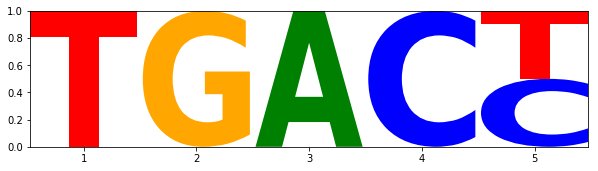

In [14]:
draw_matrix('TF_motif_seq_0270')

In [15]:
seq_0270 = dfp[dfp.matrix_ID == 'TF_motif_seq_0270']
seq_0270.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
0,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0270
6,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPK...,TF_motif_seq_0270
12,AT1G13960,TFprotseq_12500,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0270
18,AT1G13960,TFprotseq_12500,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPK...,TF_motif_seq_0270
24,AT1G18860,TFprotseq_12501,MDEAKEENRRLKSSLSKIKKDFDILQTQYNQLMAKHNEPTKFQSKG...,MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...,TF_motif_seq_0270


In [16]:
seq_0270_DBD = seq_0270['DBD_seq']
seq_0270_DBD.head()

0     ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...
6     LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPK...
12    ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...
18    LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPK...
24    MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...
Name: DBD_seq, dtype: object

嘗試尋找 Longest common substring ...

In [17]:
def lcs(S,T):
    m = len(S)
    n = len(T)
    counter = [[0]*(n+1) for x in range(m+1)]
    longest = 0
    lcs_set = set()
    for i in range(m):
        for j in range(n):
            if S[i] == T[j]:
                c = counter[i][j] + 1
                counter[i+1][j+1] = c
                if c > longest:
                    lcs_set = set()
                    longest = c
                    lcs_set.add(S[i-c+1:i+1])
                elif c == longest:
                    lcs_set.add(S[i-c+1:i+1])

    return lcs_set

當我們將`c`愈調愈大時，結果不如預期...

In [18]:
y = seq_0270_DBD[0]
c = 0
for x in seq_0270_DBD:
    c = c + 1
    if c == 2:
        break
    ret = lcs(y, x)
    y = list(ret)[0]
print(y)

ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP
